In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('data_skripsi_bulanan_2.csv', index_col='Tahun', parse_dates=True)

# Mengonversi indeks menjadi tipe data datetime dan menetapkan frekuensi harian ('D')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.head(3)

,TPT Jabar,TPAK Jabar,Jumlah Angkatan Kerja Jabar,Pendaftaran Pencari Kerja Jabar,Lowongan Kerja Terdaftar Jabar,Pemenuhan Tenaga Kerja Jabar,Laju Pertumbuhan Ekonomi Indonesia,Laju Pertumbuhan PDRB Jabar,Laju Pertumbuhan Penduduk Jabar,Laju Inflasi Indonesia,Laju Inflasi Bandung,APM Indonesia,IPM Jabar
Tahun,,,,,,,,,,,,,
1986-01-01,9.84,51.98,946633.54,117801.38,16332.62,11886.0,2.08,6.79,2.57,8.84,10.07,5.62,67.18
1986-02-01,9.33,51.97,1882490.08,122177.77,18430.23,13834.0,2.09,6.68,2.57,8.84,9.95,5.64,67.18
1986-03-01,8.82,51.95,2818346.62,126554.15,20527.85,15782.0,2.10,6.56,2.57,8.85,9.83,5.65,67.18


In [4]:
min_values_tpt = data['TPT Jabar'].min()
print(f"min_values: {min_values_tpt}")
max_values_tpt = data['TPT Jabar'].max()
print(f"max_values: {max_values_tpt}")

min_values: 3.28
max_values: 15.08


In [5]:
data.columns

Index(['TPT Jabar', 'TPAK Jabar', 'Jumlah Angkatan Kerja Jabar',
       'Pendaftaran Pencari Kerja Jabar', 'Lowongan Kerja Terdaftar Jabar',
       'Pemenuhan Tenaga Kerja Jabar', 'Laju Pertumbuhan Ekonomi Indonesia',
       'Laju Pertumbuhan PDRB Jabar', 'Laju Pertumbuhan Penduduk Jabar',
       'Laju Inflasi Indonesia', 'Laju Inflasi Bandung', 'APM Indonesia',
       'IPM Jabar'],
      dtype='object')

In [6]:
columns_to_normalize = data.columns

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [7]:
data.head()

,TPT Jabar,TPAK Jabar,Jumlah Angkatan Kerja Jabar,Pendaftaran Pencari Kerja Jabar,Lowongan Kerja Terdaftar Jabar,Pemenuhan Tenaga Kerja Jabar,Laju Pertumbuhan Ekonomi Indonesia,Laju Pertumbuhan PDRB Jabar,Laju Pertumbuhan Penduduk Jabar,Laju Inflasi Indonesia,Laju Inflasi Bandung,APM Indonesia,IPM Jabar
Tahun,,,,,,,,,,,,,
1986-01-01,0.555932,0.064815,0.000000,0.086747,0.027070,0.027357,0.470366,0.915932,1.0,0.100579,0.127212,0.000000,0.289474
1986-02-01,0.512712,0.064270,0.037994,0.090227,0.030859,0.032001,0.471627,0.911894,1.0,0.100579,0.125397,0.001314,0.289474
1986-03-01,0.469492,0.063181,0.075988,0.093706,0.034648,0.036644,0.472888,0.907489,1.0,0.100720,0.123582,0.001971,0.289474
1986-04-01,0.427119,0.062636,0.113983,0.097185,0.038437,0.041288,0.474149,0.903451,1.0,0.100720,0.121767,0.003285,0.288278
1986-05-01,0.383898,0.061547,0.151977,0.100664,0.042225,0.045932,0.476671,0.899413,1.0,0.100862,0.119952,0.003942,0.288278


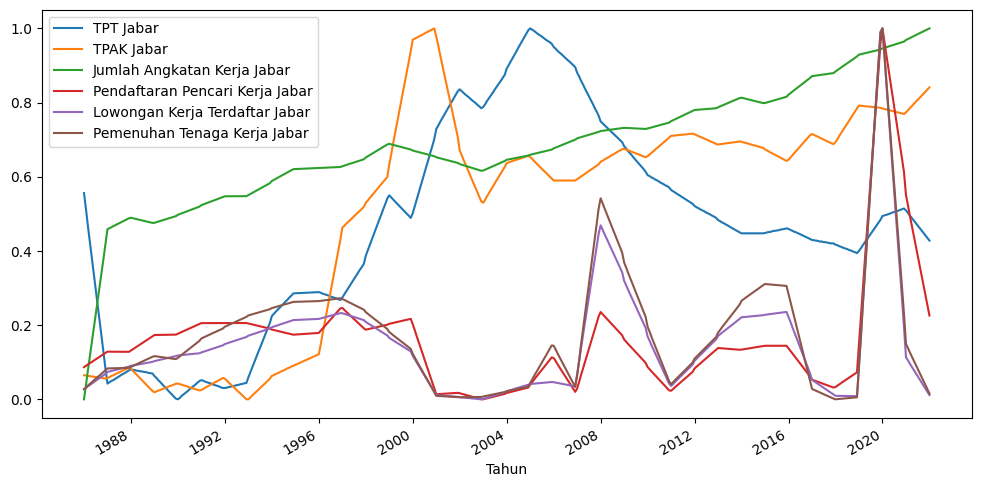

In [8]:
ax = data[['TPT Jabar', 'TPAK Jabar', 'Jumlah Angkatan Kerja Jabar',
       'Pendaftaran Pencari Kerja Jabar', 'Lowongan Kerja Terdaftar Jabar',
       'Pemenuhan Tenaga Kerja Jabar']].plot(figsize=(12,6))

# Mengatur legenda di kiri atas
ax.legend(loc='upper left')

# Menampilkan plot
plt.show()

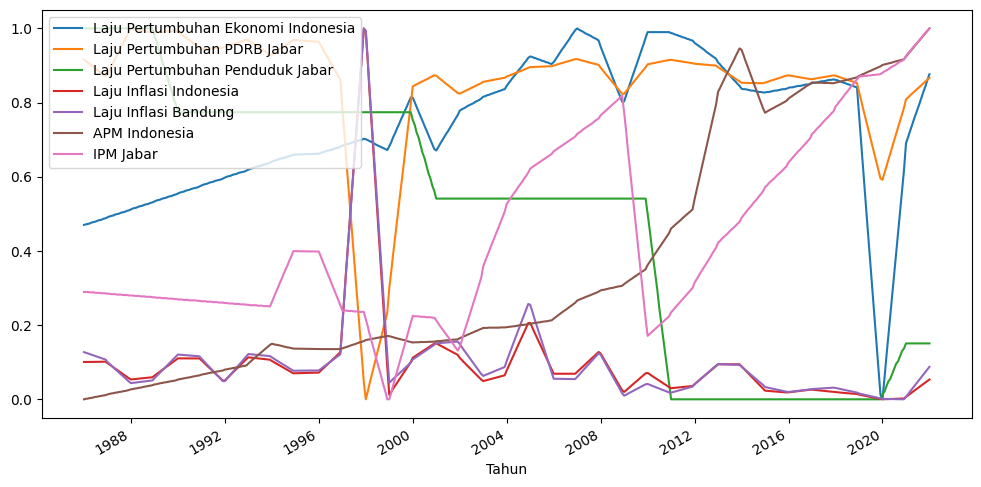

In [9]:
ax = data[['Laju Pertumbuhan Ekonomi Indonesia',
       'Laju Pertumbuhan PDRB Jabar',
       'Laju Pertumbuhan Penduduk Jabar', 'Laju Inflasi Indonesia',
       'Laju Inflasi Bandung', 'APM Indonesia', 'IPM Jabar']].plot(figsize=(12,6))

# Mengatur legenda di kiri atas
ax.legend(loc='upper left')

# Menampilkan plot
plt.show()

In [10]:
# Preprocessing data
X = data.drop(columns=['TPT Jabar']).values  # Mengambil semua kolom kecuali 'TPT Jabar'
y = data['TPT Jabar'].values.reshape(-1, 1)  # Mengambil kolom 'TPT Jabar'

In [11]:
# split data menjadi data training dan data testing secara sequential
split_data = int(len(data) * 0.7) 
X_train = X[:split_data]
X_test = X[split_data:]
y_train = y[:split_data]
y_test = y[split_data:]

In [12]:
# Membangun model jaringan saraf
model = Sequential()

# Menambahkan layer input dengan jummlah neuron, sesuai dengan jumlah fitur pada X_train
model.add(Dense(2, 
                input_dim=X_train.shape[1], 
                activation='sigmoid'))

# Menambahkan layer output dengan 1 neuron untuk forecasting
model.add(Dense(1, 
                activation='linear'))

In [13]:
# Kompilasi model dengan menggunakan Adam optimizer
optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [14]:
# Latih model
epochs = 1000
batch_size =8

In [15]:
training = model.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     verbose=1, )
training

Epoch 1/1000
37/37 [==============================] - 1s 3ms/step - loss: 0.1550
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 5/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0872
Epoch 8/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 9/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 10/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 11/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 12/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 13/1000
37/37 [====

In [16]:
# Evaluasi model dengan data uji
loss = model.evaluate(X_test, y_test, 
                      verbose=0)
print(f"Loss pada data uji: {loss}")

Loss pada data uji: 0.018815385177731514


In [17]:
# Prediksi menggunakan model
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 4ms/step


array([[0.5356886 ],
       [0.5315108 ],
       [0.52697986],
       [0.5229277 ],
       [0.51848775],
       [0.51449865],
       [0.50134546],
       [0.49271756],
       [0.4843498 ],
       [0.4763618 ],
       [0.4685107 ],
       [0.4608459 ],
       [0.45296532],
       [0.44576102],
       [0.438811  ],
       [0.43213958],
       [0.42555994],
       [0.41916507],
       [0.41095597],
       [0.40917116],
       [0.4073295 ],
       [0.40541726],
       [0.4034366 ],
       [0.4014246 ],
       [0.39992374],
       [0.39794773],
       [0.3960386 ],
       [0.39422542],
       [0.3925125 ],
       [0.3908711 ],
       [0.3924268 ],
       [0.39606637],
       [0.3998372 ],
       [0.40345496],
       [0.40722543],
       [0.41098744],
       [0.41529554],
       [0.4192347 ],
       [0.4233566 ],
       [0.42748863],
       [0.4319951 ],
       [0.43654937],
       [0.43980962],
       [0.43859202],
       [0.43736523],
       [0.4360326 ],
       [0.43501383],
       [0.433

In [18]:
# Denormalisasi hasil prediksi (y_pred) dan data uji (y_test)
y_pred_denormalized = y_pred * (max_values_tpt - min_values_tpt) + min_values_tpt
print(f"y_pred_denormalized: {y_pred_denormalized}")

y_pred_denormalized: [[9.601126 ]
 [9.551827 ]
 [9.498363 ]
 [9.450547 ]
 [9.398155 ]
 [9.351084 ]
 [9.195876 ]
 [9.094068 ]
 [8.995328 ]
 [8.90107  ]
 [8.808426 ]
 [8.717981 ]
 [8.62499  ]
 [8.53998  ]
 [8.45797  ]
 [8.379247 ]
 [8.301607 ]
 [8.226148 ]
 [8.12928  ]
 [8.10822  ]
 [8.086488 ]
 [8.063924 ]
 [8.040552 ]
 [8.01681  ]
 [7.9990997]
 [7.9757833]
 [7.9532557]
 [7.93186  ]
 [7.911648 ]
 [7.8922787]
 [7.910636 ]
 [7.953583 ]
 [7.9980793]
 [8.040769 ]
 [8.08526  ]
 [8.129652 ]
 [8.180488 ]
 [8.22697  ]
 [8.275608 ]
 [8.324366 ]
 [8.3775425]
 [8.431283 ]
 [8.469753 ]
 [8.455386 ]
 [8.440909 ]
 [8.425184 ]
 [8.413163 ]
 [8.399715 ]
 [8.383727 ]
 [8.370442 ]
 [8.3586855]
 [8.343482 ]
 [8.329662 ]
 [8.316092 ]
 [8.318901 ]
 [8.3321705]
 [8.344885 ]
 [8.358154 ]
 [8.373955 ]
 [8.387009 ]
 [8.398442 ]
 [8.411502 ]
 [8.427396 ]
 [8.440704 ]
 [8.453536 ]
 [8.466865 ]
 [8.515243 ]
 [8.545628 ]
 [8.577785 ]
 [8.610304 ]
 [8.642497 ]
 [8.676011 ]
 [8.709678 ]
 [8.743967 ]
 [8.777653 ]
 [8.

In [19]:
y_test_denormalized = y_test * (max_values_tpt - min_values_tpt) + min_values_tpt
print(f"y_test_denormalized: {y_test_denormalized}")

y_test_denormalized: [[9.7 ]
 [9.66]
 [9.62]
 [9.58]
 [9.54]
 [9.5 ]
 [9.43]
 [9.39]
 [9.36]
 [9.32]
 [9.29]
 [9.26]
 [9.22]
 [9.19]
 [9.16]
 [9.12]
 [9.09]
 [9.05]
 [8.98]
 [8.95]
 [8.91]
 [8.88]
 [8.84]
 [8.81]
 [8.77]
 [8.73]
 [8.7 ]
 [8.66]
 [8.63]
 [8.59]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.57]
 [8.59]
 [8.6 ]
 [8.61]
 [8.63]
 [8.64]
 [8.65]
 [8.66]
 [8.68]
 [8.69]
 [8.7 ]
 [8.72]
 [8.7 ]
 [8.67]
 [8.64]
 [8.61]
 [8.59]
 [8.56]
 [8.53]
 [8.5 ]
 [8.47]
 [8.44]
 [8.41]
 [8.38]
 [8.35]
 [8.34]
 [8.33]
 [8.32]
 [8.3 ]
 [8.3 ]
 [8.28]
 [8.28]
 [8.26]
 [8.25]
 [8.24]
 [8.24]
 [8.2 ]
 [8.18]
 [8.15]
 [8.13]
 [8.1 ]
 [8.08]
 [8.06]
 [8.03]
 [8.01]
 [7.98]
 [7.96]
 [7.93]
 [8.  ]
 [8.09]
 [8.18]
 [8.27]
 [8.36]
 [8.45]
 [8.54]
 [8.63]
 [8.72]
 [8.81]
 [8.9 ]
 [8.99]
 [9.11]
 [9.13]
 [9.15]
 [9.17]
 [9.19]
 [9.22]
 [9.24]
 [9.26]
 [9.28]
 [9.3 ]
 [9.33]
 [9.35]
 [9.29]
 [9.21]
 [9.13]
 [9.05]
 [8.97]
 [8.89]
 [8.81]
 [8.73]
 [8

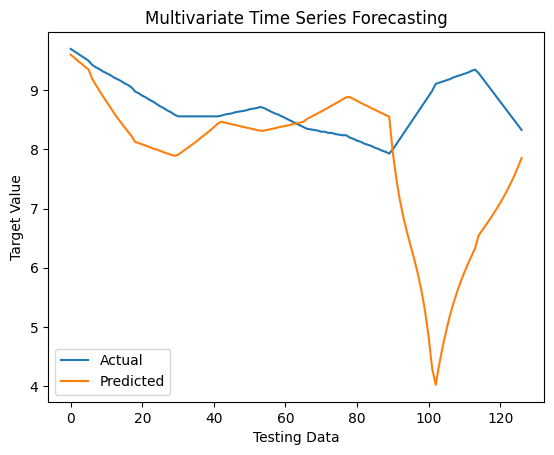

In [20]:
# Visualize actual and predicted values
plt.plot(y_test_denormalized, label="Actual")
plt.plot(y_pred_denormalized, label="Predicted")
plt.title("Multivariate Time Series Forecasting")
plt.xlabel("Testing Data")
plt.ylabel("Target Value")
plt.legend()
plt.show()

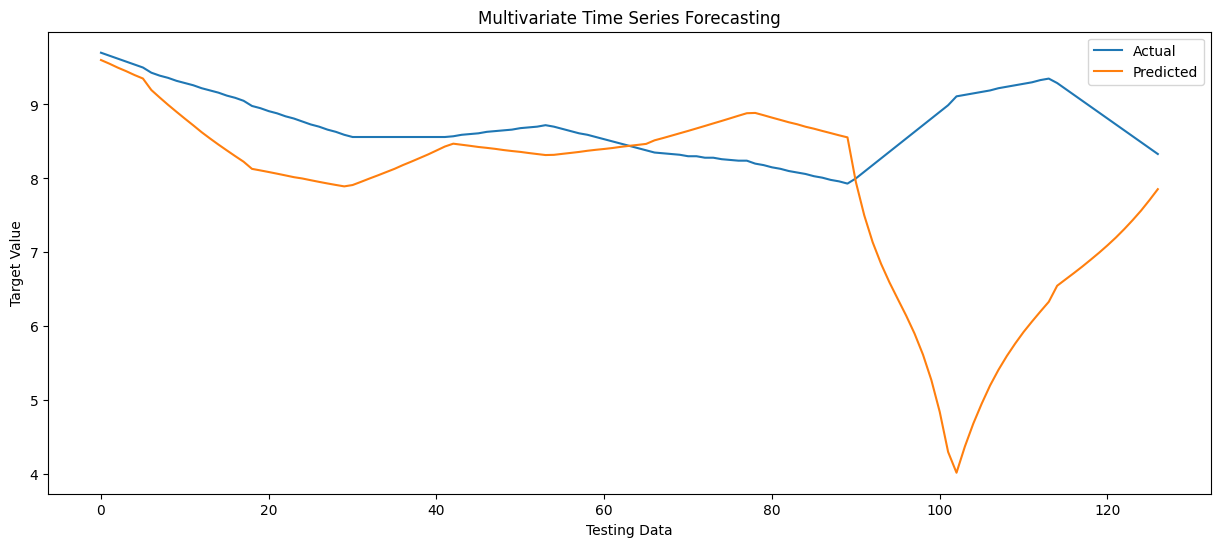

In [21]:
import matplotlib.pyplot as plt
# Plot actual and predicted values
plt.figure(figsize=(15, 6))  # Ukuran gambar lebih besar (contoh: 30x18)

# Plot actual values
plt.plot(y_test_denormalized, label="Actual")

# Plot predicted values (jika hanya ada 50 data prediksi)
plt.plot(y_pred_denormalized, label="Predicted")

plt.title("Multivariate Time Series Forecasting")
plt.xlabel("Testing Data")
plt.ylabel("Target Value")
plt.legend()

In [22]:
# Hitung Mean Squared Error pada data uji setelah denormalisasi
mse_denormalized = mean_squared_error(y_test_denormalized, 
                                      y_pred_denormalized)
print(f"Mean Squared Error pada data uji setelah denormalisasi: {mse_denormalized}")

Mean Squared Error pada data uji setelah denormalisasi: 2.6198546195999386
